In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-06-04 09:45:37.241502: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 09:45:37.241608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 09:45:37.376526: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data_dir = './dataset'

In [3]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('../input/rice-leaf-diseases/rice_leaf_diseases')

In [4]:
list(data_dir.glob("*DSC*.jpg"))

[]

In [6]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

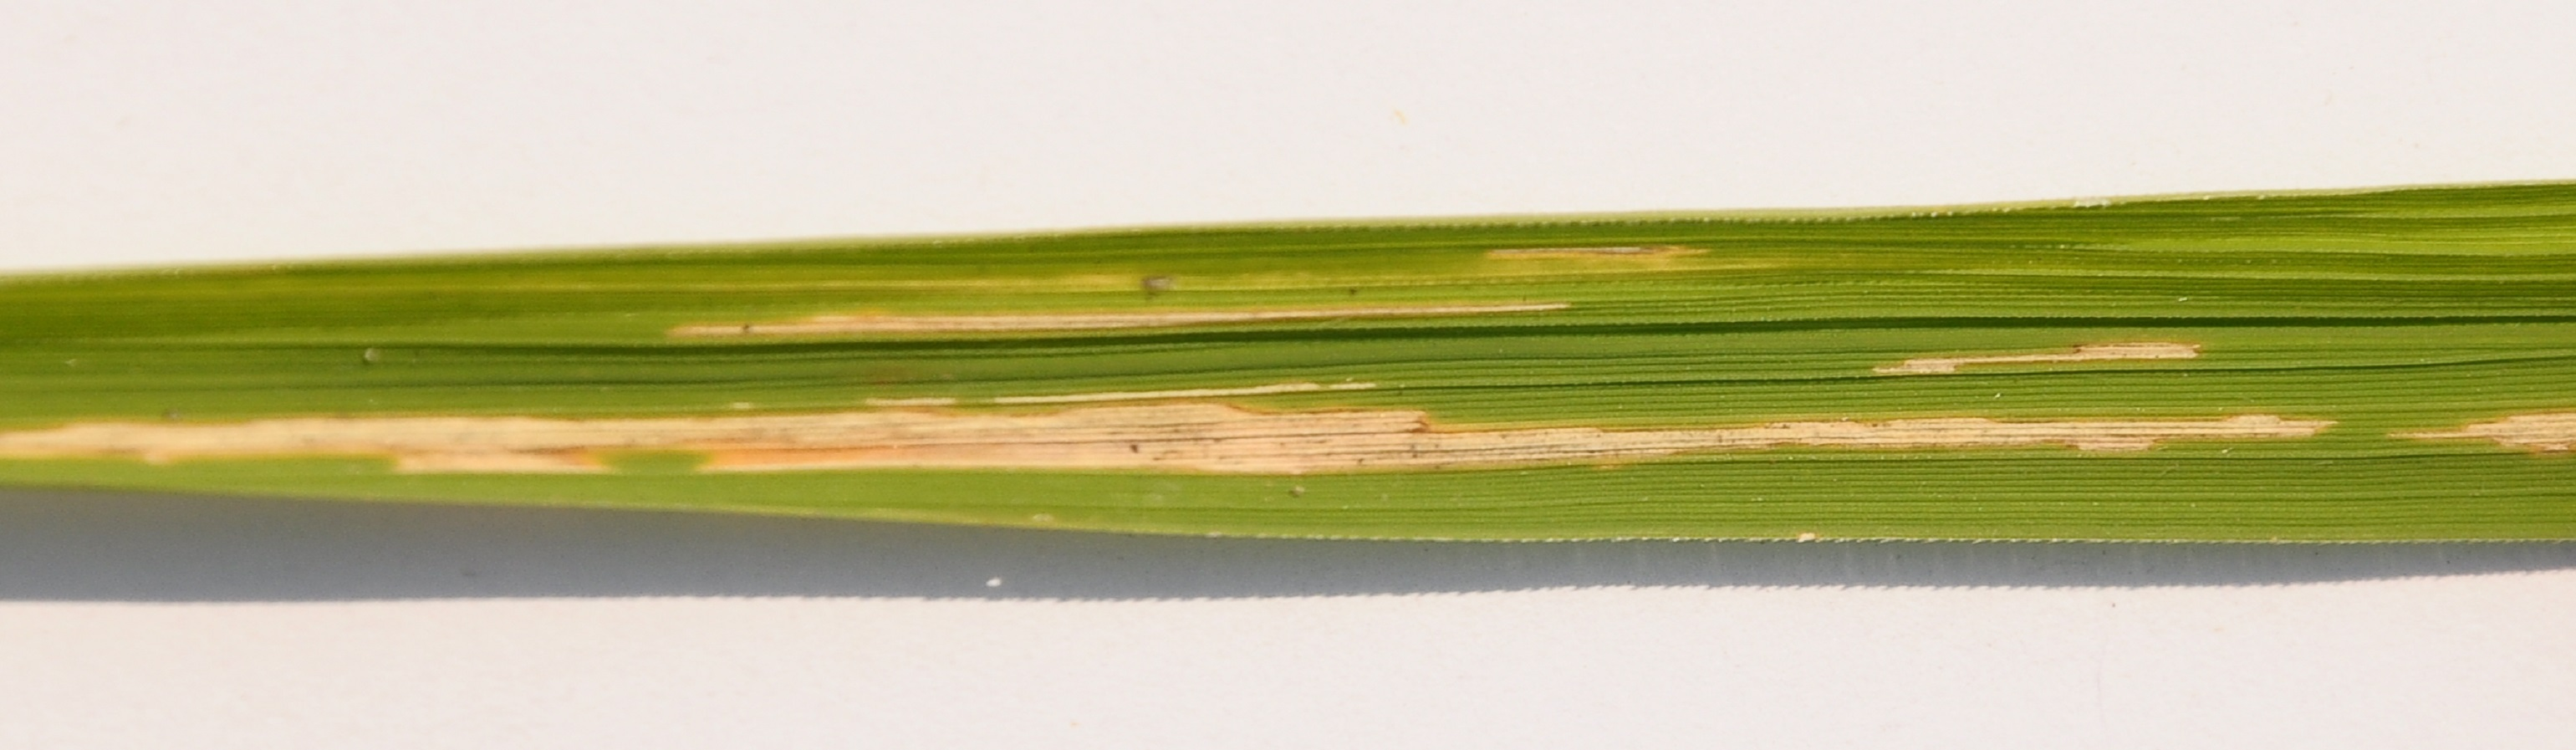

In [7]:
PIL.Image.open(str(bacteria[0]))

In [8]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

40

In [9]:
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),"smut":list(data_dir.glob("Leaf smut/*"))}

In [10]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
   
}

In [11]:
str(dict["smut"][0])

'../input/rice-leaf-diseases/rice_leaf_diseases/Leaf smut/DSC_0330.jpg'

In [12]:
img=cv2.imread(str((dict["smut"][0])))

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [15]:
y[:5]

[0, 0, 0, 0, 0]

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
len(X_test)

30

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
num_classes = 3
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


2024-06-04 09:48:32.776423: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.65903, expected 1.97884
2024-06-04 09:48:32.776486: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 3.48014, expected 2.79995
2024-06-04 09:48:32.776499: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.27252, expected 3.59232
2024-06-04 09:48:32.776513: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.49599, expected 3.8158
2024-06-04 09:48:32.776530: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.91459, expected 3.2344
2024-06-04 09:48:32.776544: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.81327, expected 4.13307
2024-06-04 09:48:32.776555: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.54455, expected 4.86435
2024-06-04 09:48:32.776565: E external/local_xla/xla/serv

1/3 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step - accuracy: 0.2812 - loss: 1.1262

I0000 00:00:1717494516.253298     164 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-06-04 09:48:36.608087: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.05052, expected 2.16279
2024-06-04 09:48:36.608147: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.36203, expected 5.47431
2024-06-04 09:48:36.608157: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.60761, expected 4.71989
2024-06-04 09:48:36.608165: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.68864, expected 4.80091
2024-06-04 09:48:36.608173: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.53414, expected 4.64641
2024-06-04 09:48:36.608180: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.94761, expected 5.05989
2024-06-04 09:48:36.608188: E exte

3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.2906 - loss: 6.0203
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2734 - loss: 5.0469
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3174 - loss: 2.1847
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2326 - loss: 1.4504
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3581 - loss: 1.1737
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3663 - loss: 1.0781
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5333 - loss: 0.9288
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5251 - loss: 0.9810
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4521 - loss: 1.2122
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5345 - loss: 1.0169
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4410 - loss: 1.3232
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4498 - loss: 1.0571
Epoch 13/30
3

In [21]:
model.evaluate(X_test_scaled,y_test)

2024-06-04 09:49:11.183722: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.56664, expected 2.97896
2024-06-04 09:49:11.183796: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 73: 4.4893, expected 3.90162
2024-06-04 09:49:11.183812: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 108: 4.57327, expected 3.98559
2024-06-04 09:49:11.183830: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 119: 4.56161, expected 3.97392
2024-06-04 09:49:11.183844: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 136: 4.14147, expected 3.55378
2024-06-04 09:49:11.183855: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 137: 3.99909, expected 3.41141
2024-06-04 09:49:11.183867: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 138: 4.74367, expected 4.15598
2024-06-04 09:49:11.183877: E external/local_

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4667 - loss: 1.9205


[1.9205480813980103, 0.46666666865348816]

In [22]:
predictions = model.predict(X_test_scaled)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


array([[-0.14345483, -3.688907  ,  4.7376657 ],
       [-1.0230713 , -3.212878  ,  4.127325  ],
       [-1.6981373 , -1.3500235 ,  3.874619  ],
       [ 0.46489602, -1.5580271 , -0.11682949],
       [ 1.2507403 , -4.387902  ,  5.8432307 ],
       [ 1.4052441 , -2.610443  ,  0.10421243],
       [ 2.1562157 , -3.9146464 ,  1.701448  ],
       [ 0.9546642 , -2.8609474 ,  1.8984667 ],
       [ 0.33200008, -2.4390106 ,  2.1978283 ],
       [ 1.2351338 , -2.528723  ,  1.937633  ],
       [ 0.7505993 , -2.3698409 ,  1.5061928 ],
       [-0.09555297, -1.7543821 ,  1.5980268 ],
       [ 0.43548757, -3.0553074 ,  2.685289  ],
       [-2.712333  , -1.2681805 ,  3.0853581 ],
       [-0.04521673, -4.04555   ,  5.312268  ],
       [-1.314164  , -1.7443216 ,  1.8659341 ],
       [ 0.3730988 , -1.2335935 ,  0.05554607],
       [-0.5714549 , -2.228642  ,  3.252901  ],
       [ 0.6111517 , -3.3557117 ,  3.4349062 ],
       [-2.4870155 ,  0.7019612 ,  1.3921251 ],
       [-0.6115934 , -1.1687438 ,  0.670

In [23]:
score = tf.nn.softmax(predictions[0])

In [24]:
np.argmax(score)

2

In [25]:
y_test[0]

1

In [28]:
data_augmentation = keras.Sequential(
  [

    layers.RandomZoom(0.2),
    layers.RandomRotation(0.1),
    layers.RandomFlip("horizontal")
  ]
)

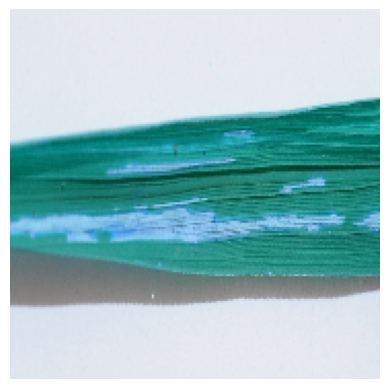

In [29]:
plt.axis('off')
plt.imshow(X[0])

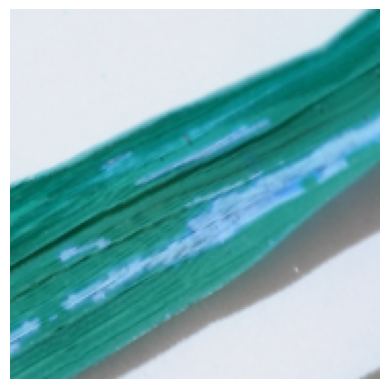

In [30]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [31]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=40)

Epoch 1/40


2024-06-04 09:52:32.029292: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - accuracy: 0.4155 - loss: 2.7694
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3252 - loss: 2.5979
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3725 - loss: 1.1868
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4200 - loss: 1.1040
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3848 - loss: 1.0801
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3846 - loss: 1.0878
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4438 - loss: 1.0840
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4122 - loss: 1.0641
Epoch 9/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4036 - loss: 1.0713
Epoch 10/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5463 - loss: 1.0567
Epoch 11/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4527 - loss: 1.0373
Epoch 12/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5446 - loss: 0.9887
Epoch 13/40

In [32]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.7000 - loss: 0.8235


[0.82352614402771, 0.699999988079071]